# Prediction Based On Statistical Hypothesis Tests

In this project, we will try to use statistical hypothesis tests on "Costumer Personality Analysis" dataset.

Firstly, we will preprocess our data, combine some columns and investigate the data in general. 

The second part will be about using statistical hypothesis tests such as "Normality Test" to see whether the data have normal distribution or not, and nonparametric statistical hypothesis tests such as Spearman's Rank Correlation Test. That is to say, the second part will mainly be about feature selection based on statistical tests. 

Lastly, we will use the features selected by statistical hypothesis tests to predict the outcome (dependent) data. We will compare different prediction algorithms by using Mean Absolute Error, Mean Squared Error and R2 scores.   

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Preparing The Data

We will calculate the total time spent on products and named it "TotalAmountSpent". In addition to this we will create two more categories named "Recency_Score" and "Age". 

In [4]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]


In [36]:
df["TotalAmountSpent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

In [6]:
df["Recency_Score"] = df["Recency"].apply(lambda x : 100 - x)
df["Recency_Score"].describe()

count    2240.000000
mean       50.890625
std        28.962453
min         1.000000
25%        26.000000
50%        51.000000
75%        76.000000
max       100.000000
Name: Recency_Score, dtype: float64

In [7]:
from datetime import datetime
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)
df["Age"].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [8]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", 
                                           "Master":"Postgraduate", "2n Cycle":"Postgraduate", 
                                           "Basic":"Undergraduate"})
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [9]:
df["Education"] = df["Education"].replace({"Undergraduate": 0, "Graduate": 1, "Postgraduate": 2})
df["Education"].value_counts()

1    1127
2    1059
0      54
Name: Education, dtype: int64

In [10]:
df["Total Children"] = df["Kidhome"] + df["Teenhome"]

In [11]:
df["Total Children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total Children, Length: 2240, dtype: int64

In [12]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
df["Marital_Status"] = df["Marital_Status"].replace({"Single": 0, "Together": 1, "Married": 2, 
                                                     "Divorced": 3, "Widow": 4, "Alone": 5, "Absurd": 6, "YOLO": 7})

In [14]:
df["Marital_Status"]

0       0
1       0
2       1
3       1
4       2
       ..
2235    2
2236    1
2237    3
2238    1
2239    2
Name: Marital_Status, Length: 2240, dtype: int64

Let's take a quick look at some of the categories.

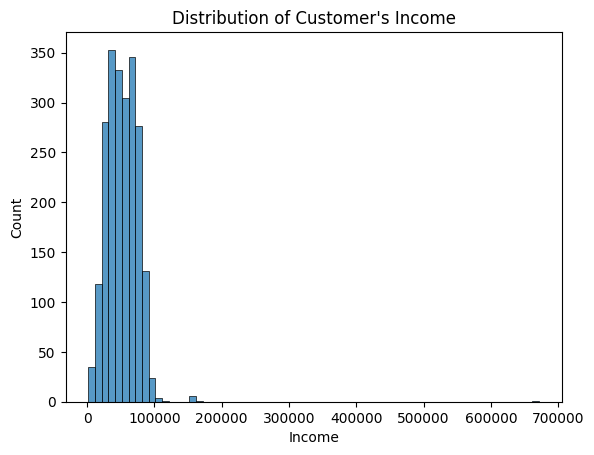

In [15]:
sns.histplot(data=df, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

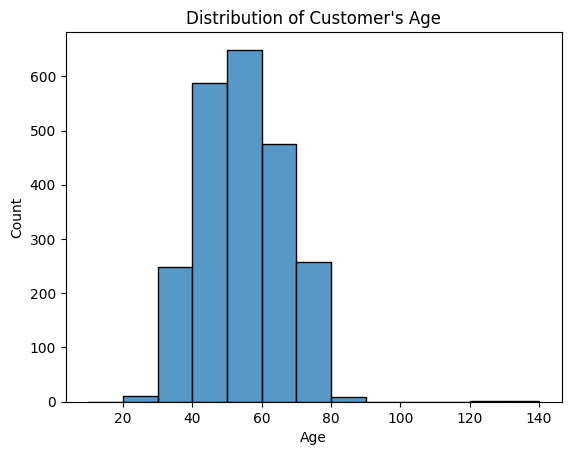

In [16]:
sns.histplot(data=df, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Age")
plt.savefig("Age.png");

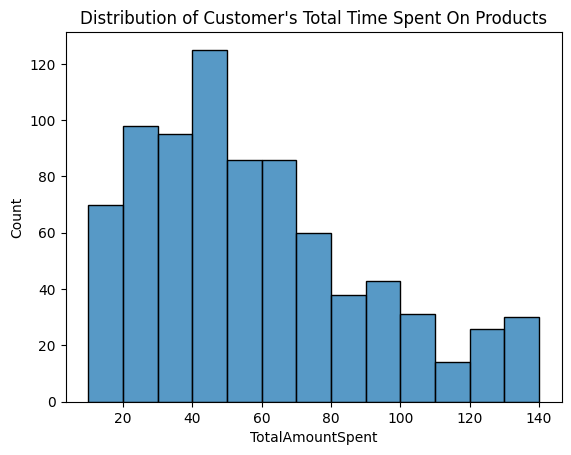

In [17]:
sns.histplot(data=df, x="TotalAmountSpent", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Total Time Spent On Products")
plt.savefig("TotalAmountSpent.png");

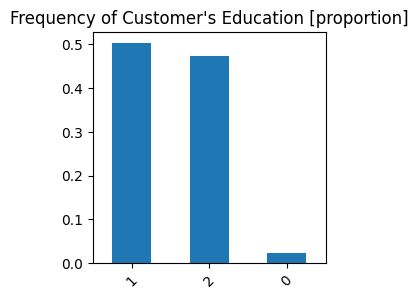

In [18]:
df["Education"].value_counts(normalize=True).plot.bar(figsize=(3, 3))
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education [proportion]");

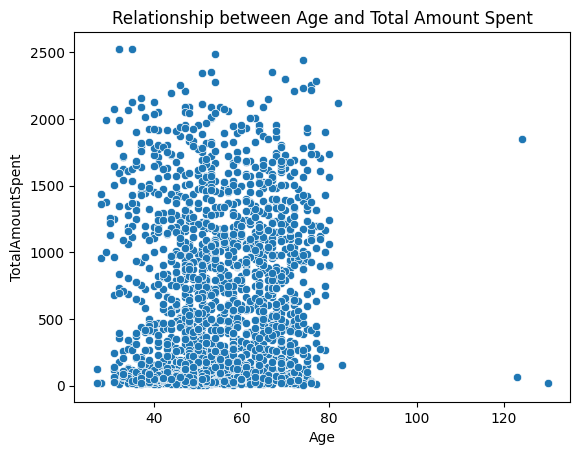

In [19]:
sns.scatterplot(data=df, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

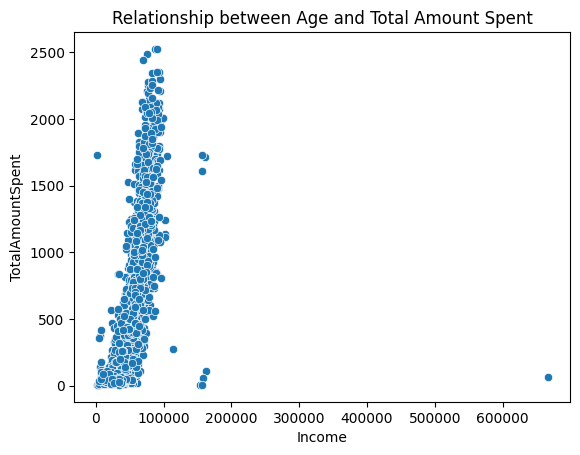

In [20]:
sns.scatterplot(data=df, x="Income", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

## Statistical Hypothesis Tests

#### Feature Selection

We need to test whether our data have a normal distribution or not. If it does so, then we will apply the parametric statistical hypothesis tests, and if not, we will continue with nonparametric statistical hypothesis tests.

In [21]:
data_num1 = df["Age"]
data_num2 = df["Income"]
data_num3 = df["Total Children"]
data_num4 = df["Recency_Score"]
data_cat1 = df["Marital_Status"]
data_cat2 = df["Education"]
outcome_data = df["TotalAmountSpent"]

In [22]:
from scipy.stats import normaltest

stat, p = normaltest(data_num1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=71.062, p=0.000
Probably not Gaussian


In [23]:
from scipy.stats import normaltest

column_list = [data_num1, data_num2, data_num3, data_num4, data_cat1, data_cat2, outcome_data] 
def normality_test(data_list):
    data_num = 0
    for data in data_list:
        data_num += 1
        stat, p = normaltest(data)
        print("data", data_num,":")
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably Gaussian')
        else:
            print('Probably not Gaussian')
        print(" ")
            
normality_test(column_list)

data 1 :
stat=71.062, p=0.000
Probably not Gaussian
 
data 2 :
stat=nan, p=nan
Probably not Gaussian
 
data 3 :
stat=67.275, p=0.000
Probably not Gaussian
 
data 4 :
stat=1847.446, p=0.000
Probably not Gaussian
 
data 5 :
stat=59.037, p=0.000
Probably not Gaussian
 
data 6 :
stat=681.688, p=0.000
Probably not Gaussian
 
data 7 :
stat=227.711, p=0.000
Probably not Gaussian
 


As we see, our data does not meet the basic principles of "Parametric Statistical Hypothesis Tests", that is, it does not have the normal distribution. This means that we have to go on with the "Nonparametric Statistical Hypothesis Tests". By applying Spearman's Rank Correlation Test, we will see whether the "quantitative" data that we have is dependent on our outcome data, namely TotalAmountSpent.

In [24]:
from scipy.stats import spearmanr
predictor_data = [data_num1, data_num2, data_num3, data_num4] 
outcome_datum = outcome_data

def spearmanr_test(predictor_data_list, outcome_data):
    data_num = 0
    for data in predictor_data_list:
        data_num += 1
        stat, p = spearmanr(data, outcome_data)
        print("comparison", data_num, ":")
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably independent')
        else:
            print('Probably dependent')
        print(" ")
            
spearmanr_test(predictor_data, outcome_datum)

comparison 1 :
stat=0.157, p=0.000
Probably dependent
 
comparison 2 :
stat=nan, p=nan
Probably dependent
 
comparison 3 :
stat=-0.484, p=0.000
Probably dependent
 
comparison 4 :
stat=-0.020, p=0.346
Probably independent
 


Let's test whether our categorical data have the same distribution with TotalAmountSpent.

In [25]:
# Kruskal-Wallis H Test
from scipy.stats import kruskal
predictor_cat_data = [data_cat1, data_cat2] 
outcome_datum = outcome_data

def kruskal_test(predictor_data_list, outcome_data):
    data_num = 0
    for data in predictor_data_list:
        data_num += 1
        stat, p = kruskal(data, outcome_data)
        print("comparison", data_num, ":")
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('Probably the same distribution')
        else:
            print('Probably different distributions')
        print(" ")
            
kruskal_test(predictor_cat_data, outcome_datum)

comparison 1 :
stat=3395.613, p=0.000
Probably different distributions
 
comparison 2 :
stat=3460.045, p=0.000
Probably different distributions
 


#### Summary

Recency_Score is independent from the outcome datum, namely "TotalAmountSpent". That is, we will not consider the column "Recency_Score" when we apply our prediction algorithm. In addition to this, categorical data such as Education and Marital_Status also are not related with the total time spent on products. We will not consider the columns Education and Marital_Status when we apply our prediction algorithm. 

## Prediction Algorithm

As shown above only the columns Age, Income and Total Children are related with the total time spent on products. This means that we will go on with these three categories while we implement the prediction algorithm.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split

In [144]:
X= df[['Income']] # this time we only take 'Income' column
Y= df[['TotalAmountSpent']]  # the target output

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

#### Clearing Missing Values

In [73]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1344, 2)
Series([], dtype: int64)


In [57]:
col_with_missing_values = [col for col in X_train.columns
                             if X_train[col].isnull().any()]
print(col_with_missing_values)

['Income']


Now we will clear the missing values in Income column and change them with the mean value of that column.

In [61]:
from sklearn.impute import SimpleImputer
# Define imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

# Perform the imputation on 'your_column'
df['Income'] = imp.fit_transform(df['Income'].values.reshape(-1, 1))

In [66]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1344, 3)
Series([], dtype: int64)


In [67]:
col_with_missing_values = [col for col in X_train.columns
                             if X_train[col].isnull().any()]
print(col_with_missing_values)

[]


#### Initial Results

We will use Linear Regression as our model.

In [99]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)
#print(X_test) #test dataset
#print(y_pred) #predicted values

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 173144.62135251952
Mean Absolute Error: 334.2922614900868
R2 Score: 0.5298679337476737


This time, let's add two other columns, Age and Total Children, in addition to our predictor data. We expect to see improvement by metrics.

In [104]:
X= df[['Age', 'Income', 'Total Children']]  # the top 3 features
Y= df[['TotalAmountSpent']]  # the target output

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 143310.0214468185
Mean Absolute Error: 290.41154651505883
R2 Score: 0.6108765263907081


#### Choosing The Best Prediction Model

Let us compare the Linear Regression, XGBRegressor and Random Forest Regressor.

In [110]:
X= df[['Age', 'Income', 'Total Children']]  # the top 3 features
Y= df[['TotalAmountSpent']]  # the target output

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 109895.90541920858
Mean Absolute Error: 220.23594329532767
R2 Score: 0.7016044236094837


In [120]:
X= df[['Age', 'Income', 'Total Children']]  # the top 3 features
Y= df[['TotalAmountSpent']]  # the target output

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

/var/folders/x3/pkxr6fs91b9dt9nf608j0q100000gn/T/ipykernel_1234/902836371.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [121]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 101143.82509943577
Mean Absolute Error: 211.44957589285715
R2 Score: 0.7253685669747216


As we can see, it gives best results with Random Forest Regressor. 

In [147]:
X= df[['Education', 'Marital_Status', 'Recency_Score']]  # the top 3 features
Y= df[['TotalAmountSpent']]  # the target output

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)

from sklearn.ensemble import RandomForestRegressor
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [148]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")

Mean Squared Error: 456032.08141301235
Mean Absolute Error: 535.6420144853847
R2 Score: -0.23824409350576015


By using statistical hypothesis tests, we have concluded that the categories such as Marital_Status, Recency_Score and Education are not related with our outcome data, namely TotalAmountSpent. Below, we made predictions based on these three categories. To sum up, the columns ('Age', 'Income', 'Total Children') that statistical hypothesis tests provides gives better results than the other columns ('Education', 'Marital Status', 'Recency Score') which were not related with the outcome data (TotalAmountSpent).

#### References:

https://www.scribbr.com/statistics/statistical-tests/

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

https://github.com/ibrahim-ogunbiyi/Customer-Segmentation/blob/main/.ipynb_checkpoints/Customer%20Segmentation-checkpoint.ipynb

https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis